In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv("cyberbullying_tweets.csv",nrows=20000)

In [52]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [53]:
df.iloc[2]["tweet_text"]

'@XochitlSuckkks a classy whore? Or more red velvet cupcakes?'

In [54]:
df["cyberbullying_type"].value_counts()

cyberbullying_type
gender               7973
not_cyberbullying    7945
religion             4082
Name: count, dtype: int64

In [26]:
import pandas as pd

# Assuming df is your original DataFrame
df = pd.read_csv("cyberbullying_tweets.csv")  # Load your data if not already loaded

# Group by 'cyberbullying_type' and sample 4000 from each group
sampled_df = (
    df.groupby("cyberbullying_type")
    .apply(lambda x: x.sample(n=4000, random_state=42))
    .reset_index(drop=True)
)

# Display the new dataset
print(sampled_df.head())

# Save the new dataset to a CSV file if needed
sampled_df.to_csv("sampled_dataset.csv", index=False)

                                          tweet_text cyberbullying_type
0  Every single one is a girl that would have bul...                age
1  that post ab kpop stans going to school togeth...                age
2  Because some people have nothing better to do,...                age
3  Bro I coach JV this past year at Skyline....Br...                age
4  These ladies really do remind me of the high s...                age


In [27]:
sampled_df["cyberbullying_type"].value_counts()

cyberbullying_type
age                    4000
ethnicity              4000
gender                 4000
not_cyberbullying      4000
other_cyberbullying    4000
religion               4000
Name: count, dtype: int64

In [55]:
to_replace = ["religion", "age", "gender", "ethnicity", "other_cyberbullying"]

In [56]:
new_df = df.copy()
for i in to_replace:
    new_df["cyberbullying_type"] = new_df["cyberbullying_type"].replace(i, 1)

In [57]:
new_df["cyberbullying_type"] = new_df["cyberbullying_type"].replace(
    "not_cyberbullying", 0
)

In [31]:
new_df = sampled_df.copy()

In [58]:
new_df.head(5)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0


([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

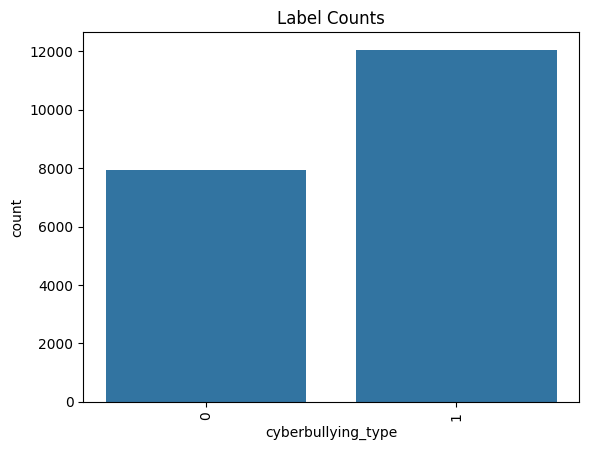

In [59]:
plt.title("Label Counts")
sns.countplot(data=new_df, x="cyberbullying_type")
plt.plot()
plt.xticks(rotation=90)

In [60]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [61]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [62]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
all_text = " ".join(new_df["tweet_text"].values)
all_text = re.sub(r"http\S+", "", all_text)
all_text = re.sub(r"@\S+", "", all_text)
all_text = re.sub(r"#\S+", "", all_text)
words = all_text.split()

In [64]:
stop_words = set(stopwords.words("english"))
words = [word for word in words if not word in stop_words]

In [65]:
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 5256),
 ('rape', 2962),
 ('gay', 2507),
 ('RT', 2103),
 ('jokes', 2038),
 ('like', 1739),
 ('people', 1336),
 ("I'm", 1167),
 ('&amp;', 1117),
 ('joke', 1114),
 ('The', 1021),
 ('call', 955),
 ('u', 942),
 ('You', 932),
 ('think', 896),
 ('get', 863),
 ('make', 862),
 ('women', 811),
 ('know', 739),
 ('one', 738),
 ('Muslim', 733),
 ('Muslims', 728),
 ('female', 703),
 ('sexist', 668),
 ('-', 650),
 ('And', 638),
 ('would', 637),
 ('jokes,', 615),
 ('Christian', 605),
 ('woman', 571),
 ('If', 561),
 ('support', 560),
 ('say', 542),
 ('even', 523),
 ('want', 520),
 ('see', 512),
 ('right', 504),
 ('men', 502),
 ('idiots', 488),
 ('never', 483),
 ('still', 469),
 ('But', 467),
 ('made', 458),
 ('go', 456),
 ('really', 451),
 ('idiot', 447),
 ('This', 445),
 ('A', 444),
 ('So', 443),
 ('making', 443),
 ('.', 430),
 ('Islamic', 429),
 ('bitch', 428),
 ('need', 418),
 ("can't", 412),
 ('hate', 410),
 ('Rape', 409),
 ('Kat', 399),
 ('What', 390),
 ('They', 386),
 ('said', 384),
 ('bul

In [66]:
slang_dict = {
    "u": "you",
    "r": "are",
    "ur": "your",
    "4": "for",
    "b4": "before",
    "gr8": "great",
    "l8r": "later",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "idk": "I don't know",
    "im": "I am",
    "w/": "with",
    "w/o": "without",
    "lol": "laugh out loud",
    "omg": "oh my god",
    "btw": "by the way",
    "bff": "best friend forever",
    "ttyl": "talk to you later",
    "brb": "be right back",
    "bc": "because",
    "cya": "see you",
    "luv": "love",
    "y": "why",
    "tho": "though",
    "til": "until",
    "ikr": "I know, right",
    "tbh": "to be honest",
    "np": "no problem",
    "jk": "just kidding",
    "smh": "shaking my head",
    "omw": "on my way",
    "thru": "through",
    "fav": "favorite",
    "msg": "message",
    "dm": "direct message",
    "bday": "birthday",
    "xoxo": "hugs and kisses",
}

In [67]:
new_df["tweet_text"] = new_df["tweet_text"].str.lower()

In [68]:
new_df["tweet_text"] = new_df["tweet_text"].apply(
    lambda text: " ".join([slang_dict.get(word, word) for word in text.split()])
)

In [69]:
new_df

,tweet_text,cyberbullying_type
0,"in other words #katandandre, your food was cra...",0
1,why is #aussietv so white? #mkr #theblock #ima...,0
2,@xochitlsuckkks a classy whore? or more red ve...,0
3,"@jason_gio meh. :p thanks for the heads up, bu...",0
4,@rudhoeenglish this is an isis account pretend...,0
...,...,...
19995,i am christian who definitely does not support...,1
19996,@yousufpoosuf @rkinglive2dance @izrinhariri no...,1
19997,how can you say barack obama was the best pres...,1
19998,another mentally ill asylum seeker. wthell do ...,1


In [70]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [71]:
from nltk.stem import PorterStemmer

In [72]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub("<.*?>", "", text)

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub("[^a-zA-Z]", " ", text).lower()

    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"#\S+", "", text)

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    # Join the words back into a string
    text = " ".join(words)
    return text

In [73]:
len(new_df)

20000

In [76]:
new_df["cleaned_text"] = new_df["tweet_text"].apply(clean_text)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
cv = CountVectorizer()
X = cv.fit_transform(new_df["cleaned_text"]).toarray()
y = new_df["cyberbullying_type"]

In [79]:
len(X)

20000

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train a Logistic Regression Model
clf = LogisticRegression(max_iter=1000)

In [82]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf = SGDClassifier(loss='log_loss')


batch_size = 1000
for i in range(0, X_train.shape[0], batch_size):
    end = i + batch_size if i + batch_size < X_train.shape[0] else X_train.shape[0]
    clf.partial_fit(X_train[i:end], y_train[i:end], classes=np.unique(y_train))

accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8077083333333334


In [84]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
y_pred = clf.predict(X_test)

In [86]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.91725


In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logreg = LogisticRegression(max_iter=500)

# Define the hyperparameters to tune
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", None], 
    "C": [0.01, 0.1, 1, 10, 100], 
    "solver": ["liblinear", "saga"],  
}


grid_search = GridSearchCV(
    estimator=logreg, param_grid=param_grid, cv=5, scoring="accuracy"
)


grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

In [88]:
import joblib

joblib.dump(clf, "model.pkl")

['model.pkl']

In [89]:
model = LogisticRegression(max_iter=1000)

In [93]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


def clean_text(text):

    text = re.sub("<.*?>", "", text)

    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"#\S+", "", text)

    words = nltk.word_tokenize(text)

    words = [w for w in words if w not in stopwords.words("english")]

    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    text = " ".join(words)
    return text


def clean_texts(texts):
    return [clean_text(text) for text in texts]


clean_transformer = FunctionTransformer(clean_texts, validate=False)

model = Pipeline(
    [
        ("cleaner", clean_transformer),
        ("vectorizer", CountVectorizer()),
        ("classifier", LogisticRegression(max_iter=1000)),
    ]
)

X = new_df["tweet_text"]
model.fit(X, y)

Pipeline(steps=[('cleaner',
                 FunctionTransformer(func=<function clean_texts at 0x00000245187271A0>)),
                ('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [94]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']

In [96]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

nltk.download("punkt")
nltk.download("stopwords")


def clean_text(text):
    text = re.sub("<.*?>", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"#\S+", "", text)

    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words("english")]

    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    text = " ".join(words)
    return text


def clean_texts(texts):
    return [clean_text(text) for text in texts]


# X_cleaned = clean_texts(new_df["tweet_text"])
X_cleaned = new_df["tweet_text"]

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X_cleaned)


classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_vectorized, y)


joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(classifier, "classifier.pkl")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['classifier.pkl']